In [ ]:
import catboost
import sklearn
import pandas as pd
import plotly.plotly as py
from sklearn.datasets import make_regression
%pylab inline

### Generate toy data

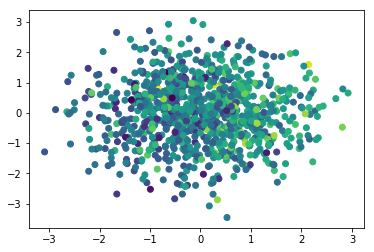

In [2]:
n_features = 3
X, y = make_regression(n_samples=1000, n_features=10, n_informative=n_features)
plt.scatter(X[:, 0], X[:, 1], c=y)
X = pd.DataFrame(X)
X.columns = ['Column_{}'.format(i) for i in range(X.shape[1])]

In [3]:
X.sample(3)

,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9
836,0.710480,0.343481,0.063288,-2.234822,-1.515168,-0.288712,-1.627862,0.851353,-1.732821,0.244226
975,-0.358489,-2.682757,0.923050,-1.299912,1.078062,0.599467,-0.331882,0.242984,0.136164,0.219414
780,0.656650,-0.952424,-1.564178,0.526909,0.667572,1.165194,0.438572,0.892462,-0.417977,0.877062


### Train model and get statistics

In [4]:
model = catboost.CatBoostRegressor()
model.fit(X, y, silent=True)

In [5]:
feature_num = 'Column_2'
res = model.get_binarized_statistics(X, y, feature_num)

### Plot statistics with plotly

In [6]:
fig = catboost.core.plot_binarized_feature_statistics(res, feature_num)
py.iplot(fig, filename='toy-data')

/home/mtg/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



### Test on Epsilon dataset

In [7]:
eps_test = pd.read_csv('./epsilon/test.csv')

In [8]:
eps_test.head(3)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,-1.0,0.005439,0.013331,-0.002186,-0.014590,0.015631,-0.032606,-0.004455,0.013611,...,0.029023,0.028153,-0.001714,-0.048453,-0.030330,-0.006301,-0.022238,-0.009459,0.027544,-0.026216
1,1,1.0,0.001442,0.033820,-0.048836,0.000652,-0.028718,0.013421,-0.006827,0.053082,...,-0.016412,0.005543,-0.017588,0.005169,0.037386,-0.002207,0.023466,0.023459,0.036497,0.033899
2,2,1.0,0.004597,-0.042784,-0.004416,-0.005692,0.000731,-0.025873,0.031471,0.059522,...,-0.020841,-0.030902,0.005387,-0.017727,-0.011851,0.007834,-0.002806,-0.004059,0.024565,-0.001050


In [9]:
eps_model = catboost.CatBoost()
eps_model.load_model('./epsilon/epsilon8k_64.bin')
print(eps_model.tree_count_)

8000


In [10]:
eps_y_test = eps_test.iloc[:, 1]

In [11]:
eps_test.drop(['Unnamed: 0', '0'], axis=1, inplace=True)

In [12]:
%%time
feature_num = 14
eps_res = eps_model.get_binarized_statistics(eps_test, eps_y_test, feature_num)

CPU times: user 43.2 s, sys: 484 ms, total: 43.7 s
Wall time: 1min 15s


In [13]:
fig = catboost.core.plot_binarized_feature_statistics(eps_res, feature_num)
py.iplot(fig, filename='basic-line')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~alex_rogozin12/0 or inside your plot.ly account where it is named 'basic-line'
